In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

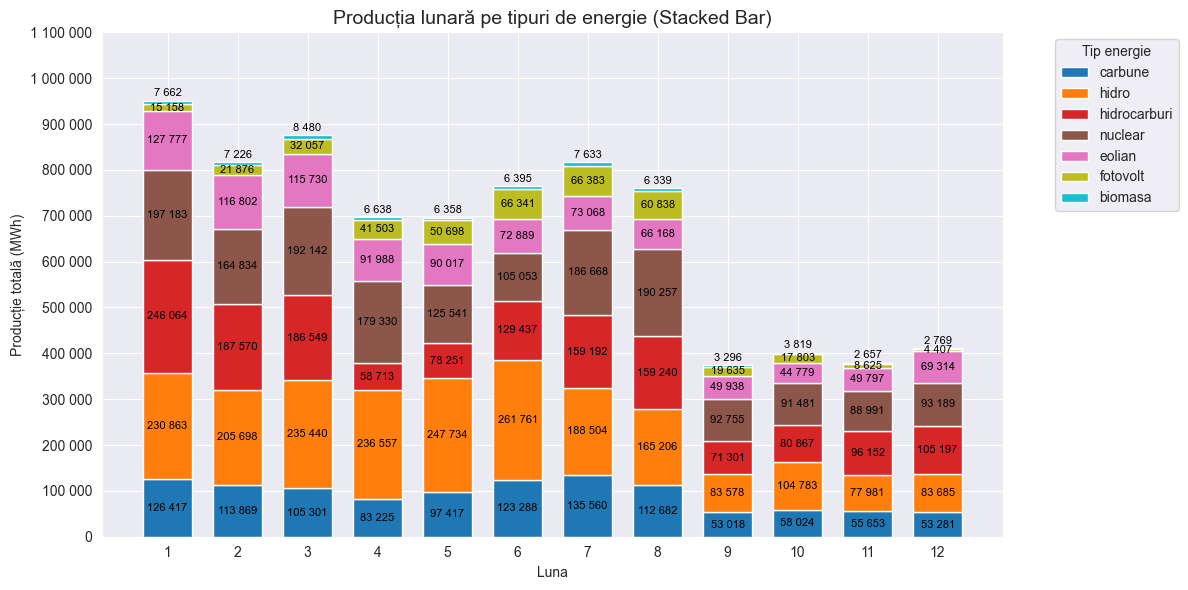

In [6]:
# Citim datele transformate
df = pd.read_csv("energie_transformata.csv")
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month

# Tipurile de energie
energy_cols = ["carbune", "hidro", "hidrocarburi", "nuclear", "eolian", "fotovolt", "biomasa"]

# Grupare lunară
monthly_sum = df.groupby("month")[energy_cols].sum().reindex(range(1, 13), fill_value=0)

# Creăm figura
fig, ax = plt.subplots(figsize=(12, 6))
bottom = np.zeros(len(monthly_sum))

# Culori diferite pentru fiecare tip
colors = plt.cm.tab10(np.linspace(0, 1, len(energy_cols)))

# Barele stivuite
for i, energy in enumerate(energy_cols):
    values = monthly_sum[energy].values
    bars = ax.bar(monthly_sum.index, values, width=0.7, label=energy, bottom=bottom, color=colors[i])

    # Etichete: pentru biomasa sus, restul în interior
    for j, val in enumerate(values):
        if val > 0:
            if energy == "biomasa":
                # Puțin deasupra barei
                ax.text(j + 1, bottom[j] + val + (bottom.max() * 0.005),  # 1% mai sus decât vârful barei
                        f"{int(val):,}".replace(",", " "),
                        ha="center", va="bottom", fontsize=8, color="black")
            else:
                # În interiorul barei
                ax.text(j + 1, bottom[j] + val / 2,
                        f"{int(val):,}".replace(",", " "),
                        ha="center", va="center", fontsize=8, color="black")
    bottom += values

# Titlu și etichete
ax.set_title("Producția lunară pe tipuri de energie (Stacked Bar)", fontsize=14)
ax.set_xlabel("Luna")
ax.set_ylabel("Producție totală (MWh)")

# Legendă
ax.legend(title="Tip energie", bbox_to_anchor=(1.05, 1), loc='upper left')

# Axa Y în pași de 100.000
max_val = bottom.max()
y_ticks = np.arange(0, max_val * 1.2, 100000)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f"{int(y):,}".replace(",", " ") for y in y_ticks])

# Lunile
plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()

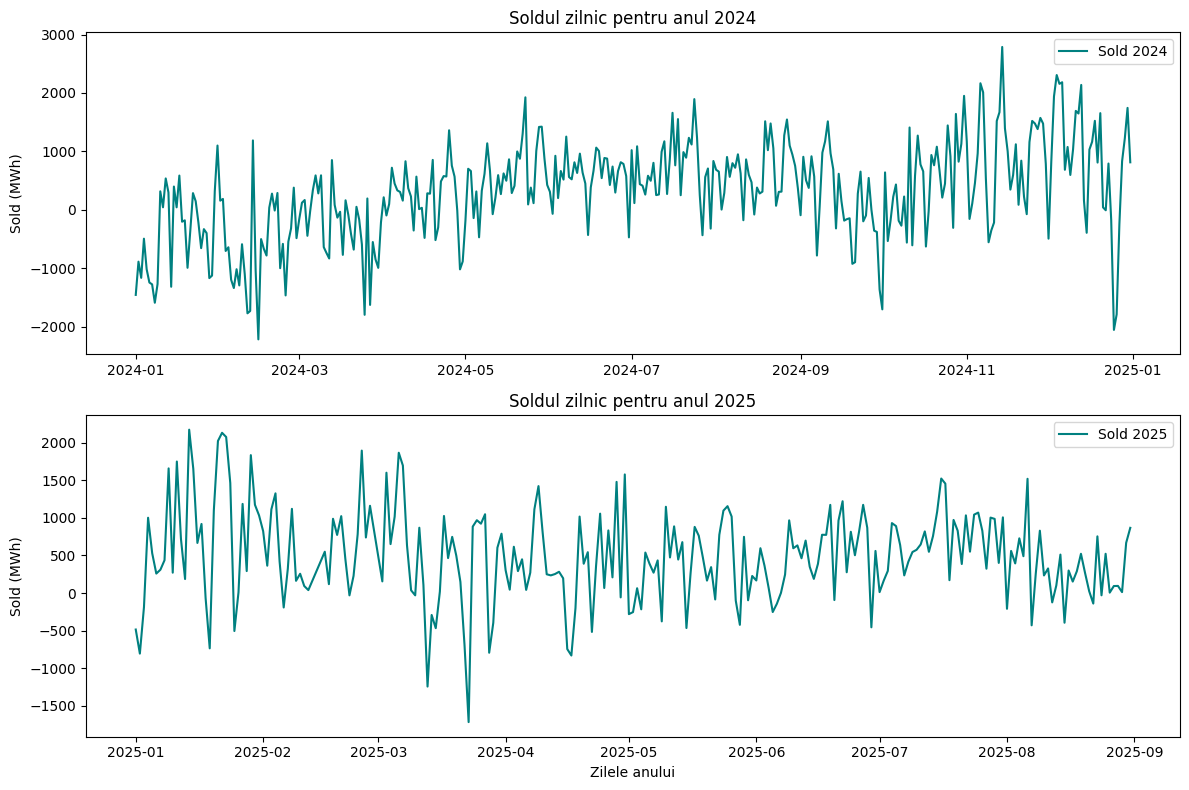

In [6]:
df["year"] = df["date"].dt.year
df["day"] = df["date"].dt.date

daily_sold = df.groupby(["year","day"])["sold"].mean().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(12,8), sharex=False)

for i, year in enumerate(sorted(daily_sold["year"].unique())):
    subset = daily_sold[daily_sold["year"] == year]
    axes[i].plot(subset["day"], subset["sold"], label=f"Sold {year}", color="teal")
    axes[i].set_title(f"Soldul zilnic pentru anul {year}")
    axes[i].set_ylabel("Sold (MWh)")
    axes[i].legend()

plt.xlabel("Zilele anului")
plt.tight_layout()
plt.show()

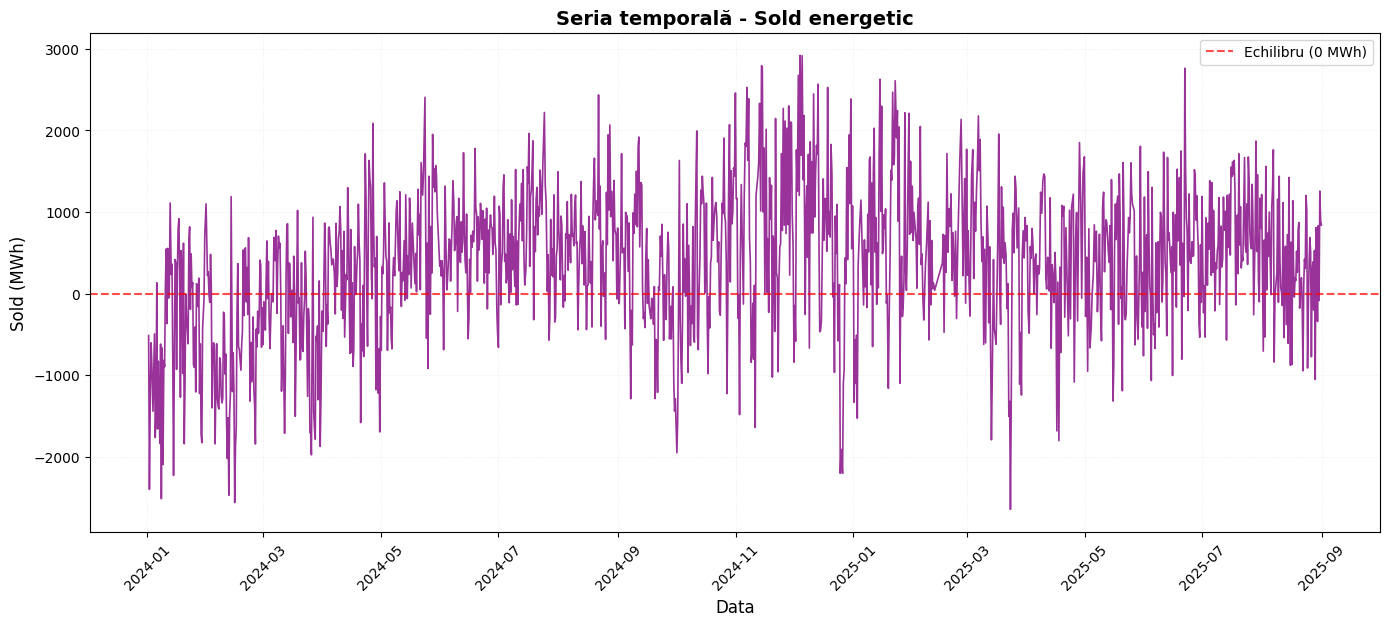

In [21]:
plt.show()
plt.figure(figsize=(14, 6))
plt.plot(df["date"], df["sold"], color="purple", linewidth=1.2, alpha=0.8)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Echilibru (0 MWh)')
plt.title("Seria temporală - Sold energetic", fontsize=14, fontweight='bold')
plt.xlabel("Data", fontsize=12)
plt.ylabel("Sold (MWh)", fontsize=12)
plt.legend(loc='best')
plt.grid(alpha=0.3, linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
# descompunerea in trend si sezonalitate + linea medie

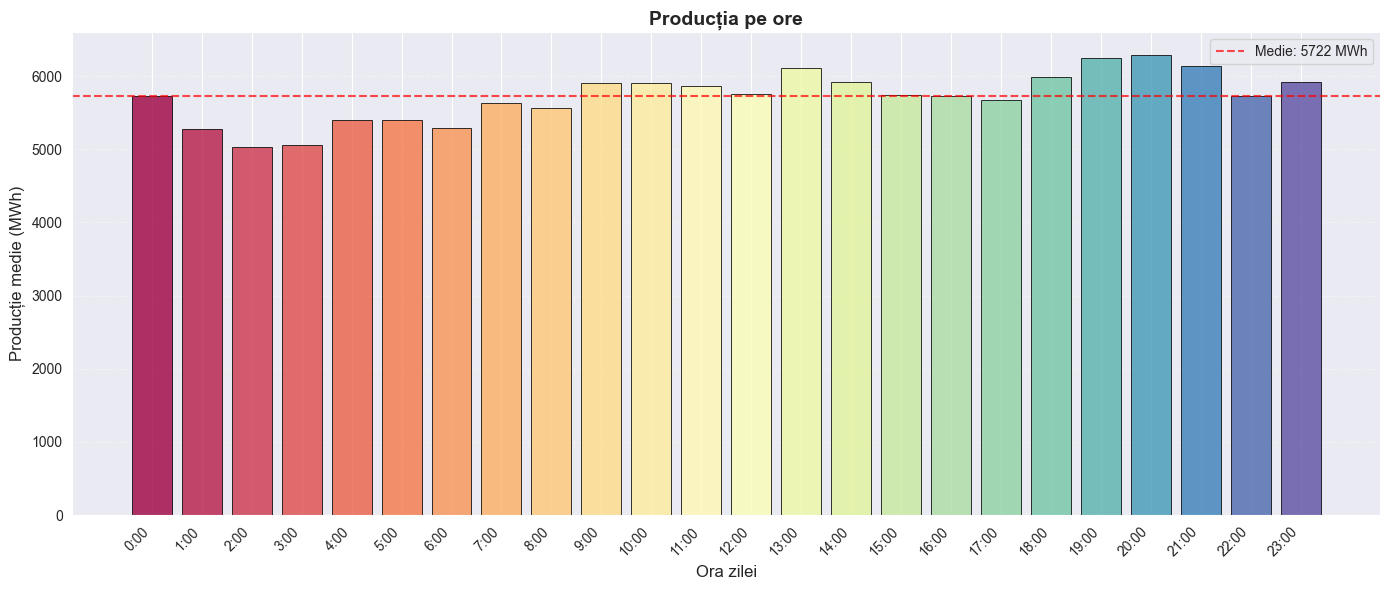

In [7]:
df["hour"] = df["date"].dt.hour
hourly_prod = df.groupby("hour")["productie"].mean()

plt.figure(figsize=(14, 6))

# Creare paletă de culori gradient
colors = plt.cm.Spectral(np.linspace(0, 1, len(hourly_prod)))

# Diagram vertical
bars = plt.bar(hourly_prod.index, hourly_prod.values, color=colors, edgecolor='black', linewidth=0.7, alpha=0.8)

plt.title("Producția pe ore", fontsize=14, fontweight='bold')
plt.xlabel("Ora zilei", fontsize=12)
plt.ylabel("Producție medie (MWh)", fontsize=12)
plt.xticks(range(0, 24), [f'{h}:00' for h in range(0, 24)], rotation=45, ha='right')
plt.axhline(y=hourly_prod.mean(), color='red', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Medie: {hourly_prod.mean():.0f} MWh')
plt.legend(loc='best')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

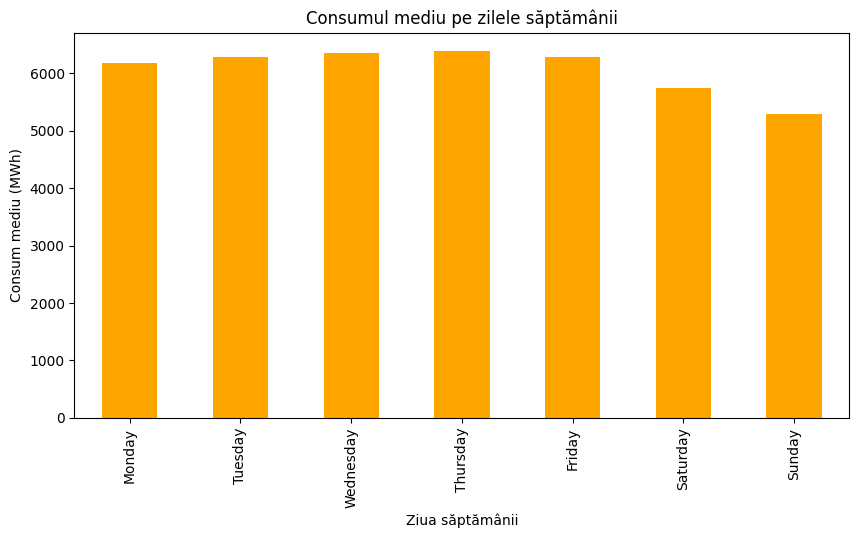

In [12]:
df["weekday"] = df["date"].dt.day_name()

weekly_consumption = df.groupby("weekday")["consum"].mean()
# Reordonăm zilele pentru claritate
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekly_consumption = weekly_consumption.reindex(order)

plt.figure(figsize=(10,5))
weekly_consumption.plot(kind="bar", color="orange")
plt.title("Consumul mediu pe zilele săptămânii")
plt.xlabel("Ziua săptămânii")
plt.ylabel("Consum mediu (MWh)")
plt.show()

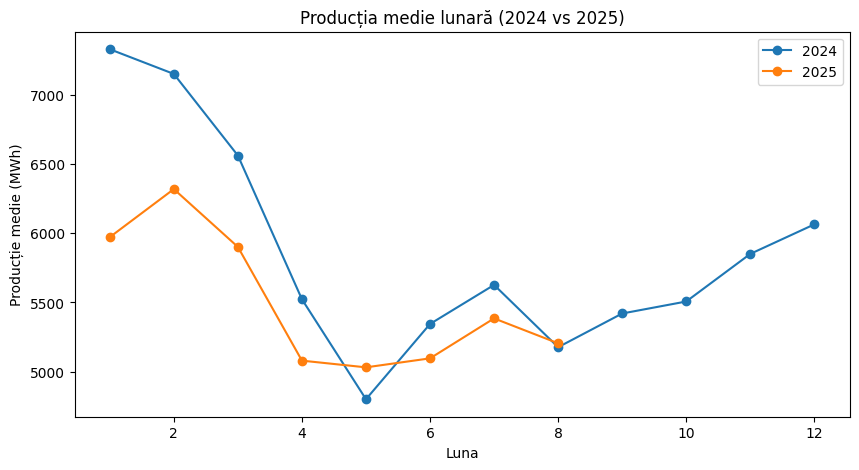

In [13]:
monthly_prod = df.groupby(["year","month"])["productie"].mean().reset_index()

plt.figure(figsize=(10,5))
for year in monthly_prod["year"].unique():
    subset = monthly_prod[monthly_prod["year"] == year]
    plt.plot(subset["month"], subset["productie"], marker="o", label=f"{year}")

plt.title("Producția medie lunară (2024 vs 2025)")
plt.xlabel("Luna")
plt.ylabel("Producție medie (MWh)")
plt.legend()
plt.show()

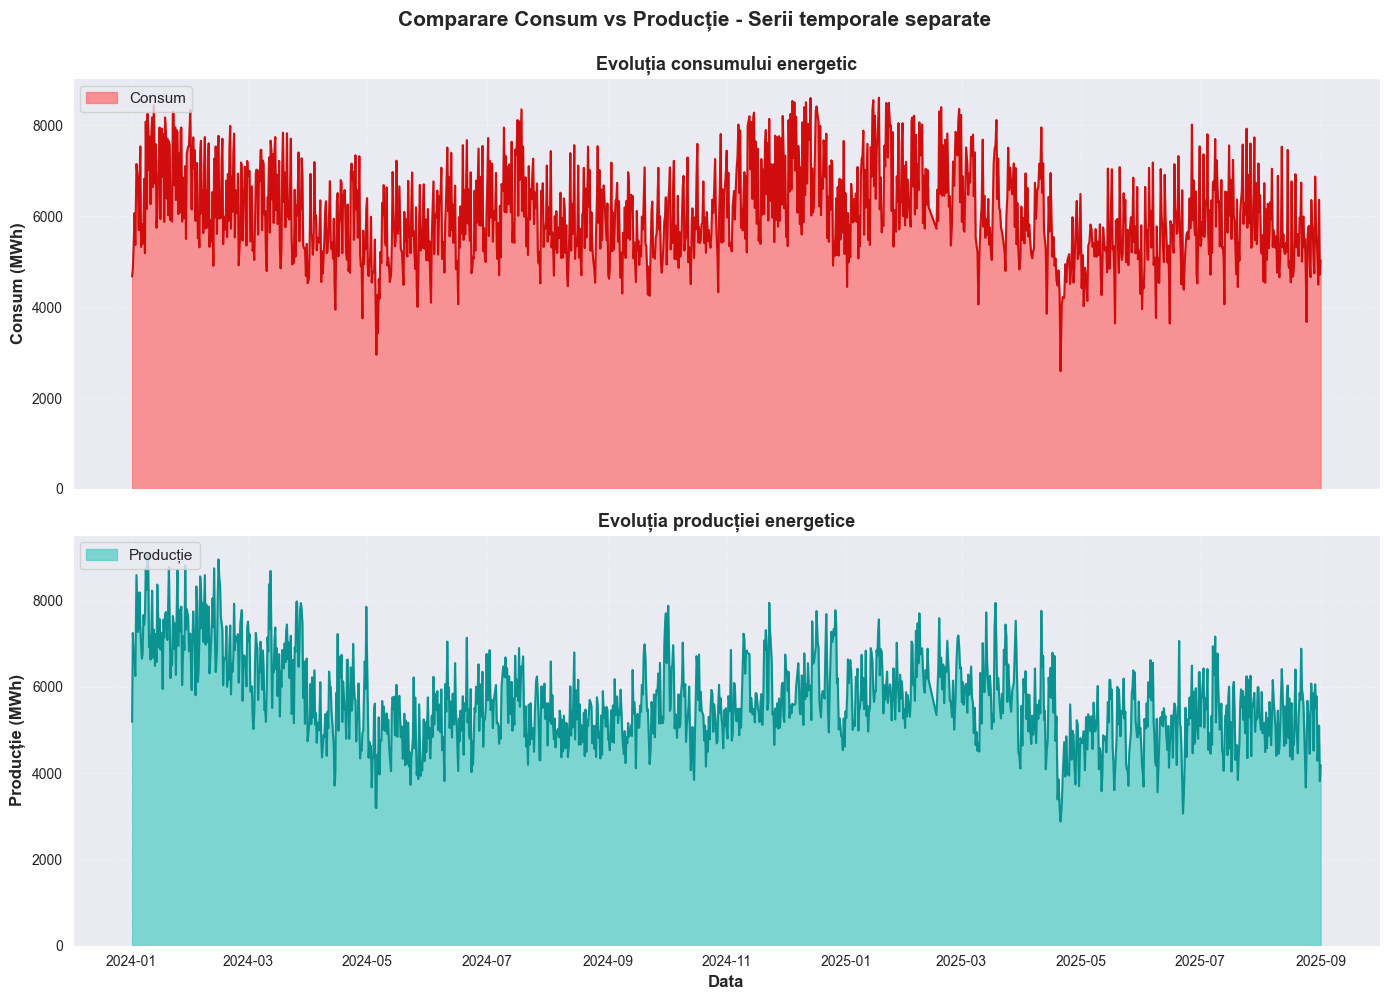

In [8]:
pivot_df = df[["date","consum","productie"]].set_index("date")

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Grafic Consum
axes[0].fill_between(pivot_df.index, 0, pivot_df["consum"],
                      color="#FF6B6B", alpha=0.7, label="Consum")
axes[0].plot(pivot_df.index, pivot_df["consum"],
             color="#CC0000", linewidth=1.5, alpha=0.9)
axes[0].set_ylabel("Consum (MWh)", fontsize=12, fontweight='bold')
axes[0].set_title("Evoluția consumului energetic", fontsize=13, fontweight='bold')
axes[0].legend(loc='upper left', fontsize=11)
axes[0].grid(alpha=0.3, linestyle='--', linewidth=0.7)
axes[0].set_ylim(bottom=0)

# Grafic Producție
axes[1].fill_between(pivot_df.index, 0, pivot_df["productie"],
                      color="#4ECDC4", alpha=0.7, label="Producție")
axes[1].plot(pivot_df.index, pivot_df["productie"],
             color="#008B8B", linewidth=1.5, alpha=0.9)
axes[1].set_xlabel("Data", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Producție (MWh)", fontsize=12, fontweight='bold')
axes[1].set_title("Evoluția producției energetice", fontsize=13, fontweight='bold')
axes[1].legend(loc='upper left', fontsize=11)
axes[1].grid(alpha=0.3, linestyle='--', linewidth=0.7)
axes[1].set_ylim(bottom=0)

plt.suptitle("Comparare Consum vs Producție - Serii temporale separate",
             fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

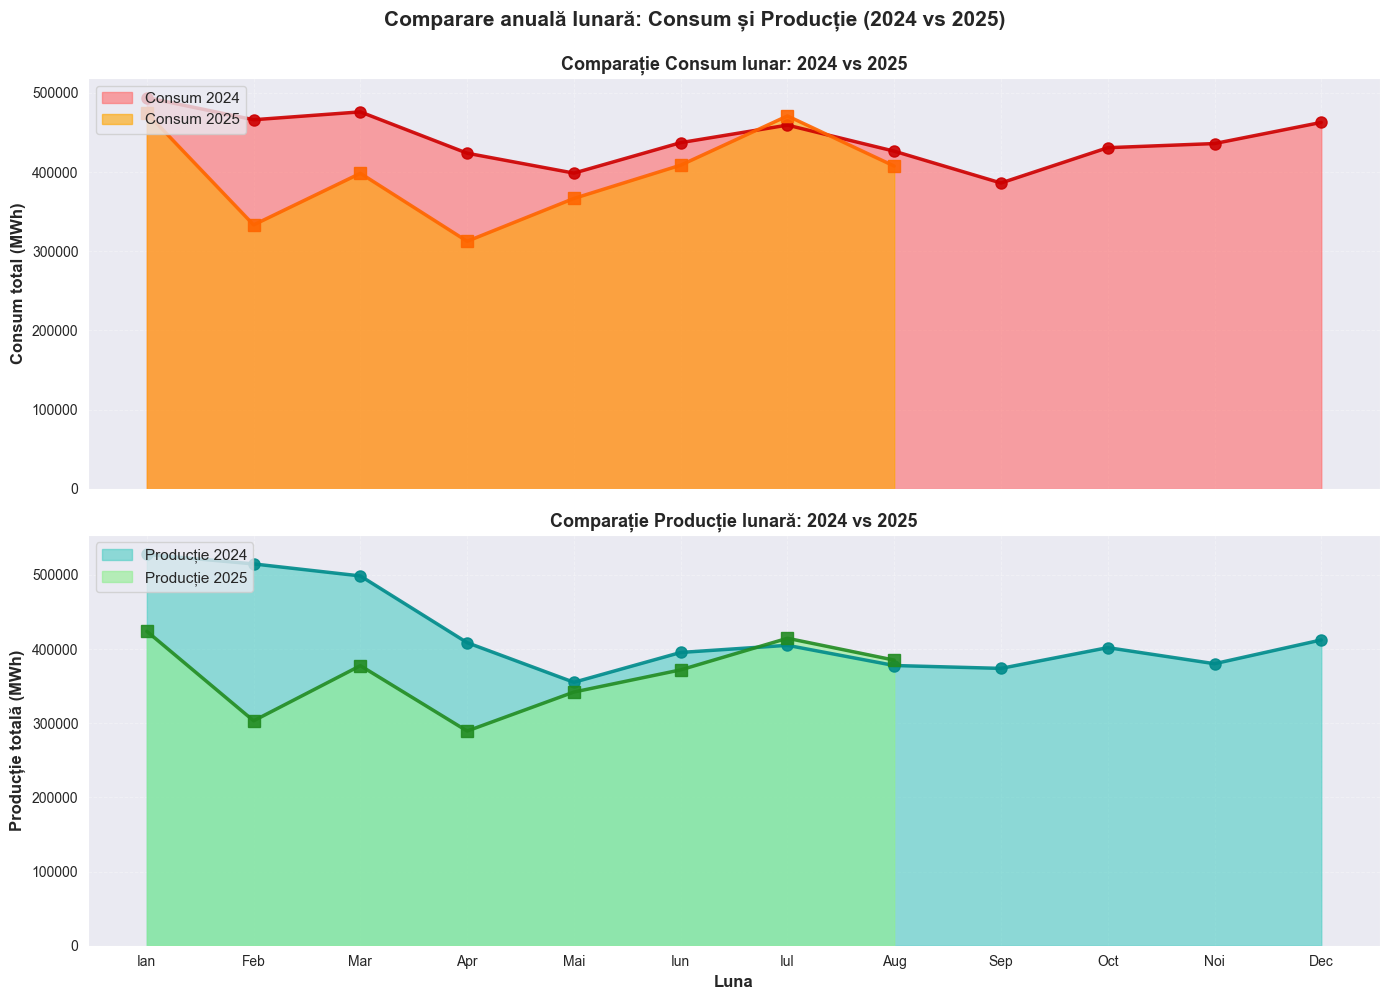

In [10]:
# Agregare date pe luni pentru fiecare an
df_2024_lunar = df[df["an"] == 2024].groupby("luna")[["consum", "productie"]].sum()
df_2025_lunar = df[df["an"] == 2025].groupby("luna")[["consum", "productie"]].sum()

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

luni = ['Ian', 'Feb', 'Mar', 'Apr', 'Mai', 'Iun', 'Iul', 'Aug', 'Sep', 'Oct', 'Noi', 'Dec']

# Grafic Consum: 2024 vs 2025
x_2024 = df_2024_lunar.index
x_2025 = df_2025_lunar.index

axes[0].fill_between(x_2024, 0, df_2024_lunar["consum"],
                      color="#FF6B6B", alpha=0.6, label="Consum 2024")
axes[0].plot(x_2024, df_2024_lunar["consum"],
             color="#CC0000", linewidth=2.5, alpha=0.9, marker='o', markersize=8)

axes[0].fill_between(x_2025, 0, df_2025_lunar["consum"],
                      color="#FFA500", alpha=0.6, label="Consum 2025")
axes[0].plot(x_2025, df_2025_lunar["consum"],
             color="#FF6500", linewidth=2.5, alpha=0.9, marker='s', markersize=8)

axes[0].set_ylabel("Consum total (MWh)", fontsize=12, fontweight='bold')
axes[0].set_title("Comparație Consum lunar: 2024 vs 2025", fontsize=13, fontweight='bold')
axes[0].legend(loc='upper left', fontsize=11)
axes[0].grid(alpha=0.3, linestyle='--', linewidth=0.7)
axes[0].set_ylim(bottom=0)
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(luni)

# Grafic Producție: 2024 vs 2025
axes[1].fill_between(x_2024, 0, df_2024_lunar["productie"],
                      color="#4ECDC4", alpha=0.6, label="Producție 2024")
axes[1].plot(x_2024, df_2024_lunar["productie"],
             color="#008B8B", linewidth=2.5, alpha=0.9, marker='o', markersize=8)

axes[1].fill_between(x_2025, 0, df_2025_lunar["productie"],
                      color="#90EE90", alpha=0.6, label="Producție 2025")
axes[1].plot(x_2025, df_2025_lunar["productie"],
             color="#228B22", linewidth=2.5, alpha=0.9, marker='s', markersize=8)

axes[1].set_xlabel("Luna", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Producție totală (MWh)", fontsize=12, fontweight='bold')
axes[1].set_title("Comparație Producție lunară: 2024 vs 2025", fontsize=13, fontweight='bold')
axes[1].legend(loc='upper left', fontsize=11)
axes[1].grid(alpha=0.3, linestyle='--', linewidth=0.7)
axes[1].set_ylim(bottom=0)
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(luni)

plt.suptitle("Comparare anuală lunară: Consum și Producție (2024 vs 2025)",
             fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

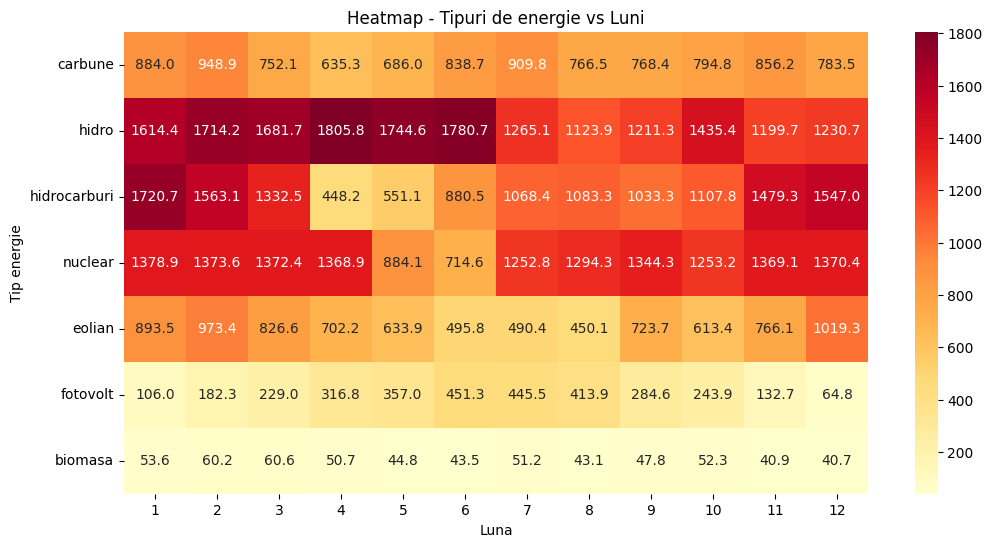

In [16]:
df = pd.read_csv("energie_transformata.csv")

# Convertim coloana 'date' în datetime și extragem luna
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month

# Lista doar cu tipuri de energie (fără consum și producție)
energy_cols = ["carbune","hidro","hidrocarburi",
               "nuclear","eolian","fotovolt",
               "biomasa"]

# Facem media pe luni
monthly_avg = df.groupby("month")[energy_cols].mean()

# Heatmap energie vs luni
plt.figure(figsize=(12,6))
sns.heatmap(monthly_avg.T, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title("Heatmap - Tipuri de energie vs Luni")
plt.xlabel("Luna")
plt.ylabel("Tip energie")
plt.show()

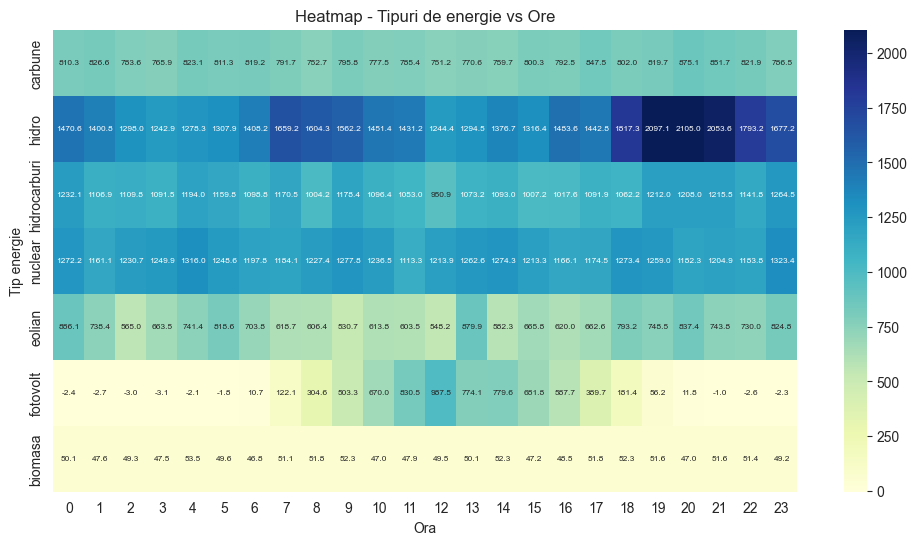

In [12]:
# Citim dataset-ul transformat
df = pd.read_csv("energie_transformata.csv")

# Convertim coloana 'date' în datetime și extragem ora
df["date"] = pd.to_datetime(df["date"])
df["hour"] = df["date"].dt.hour

# Lista doar cu tipuri de energie (fără consum și producție)
energy_cols = ["carbune","hidro","hidrocarburi",
               "nuclear","eolian","fotovolt",
               "biomasa"]

# Facem media pe ore
hourly_avg = df.groupby("hour")[energy_cols].mean()

# Heatmap energie vs ore
plt.figure(figsize=(12,6))
sns.heatmap(hourly_avg.T, cmap="YlGnBu", annot=True, annot_kws = {"size": 6}, fmt=".1f")
plt.title("Heatmap - Tipuri de energie vs Ore")
plt.xlabel("Ora")
plt.ylabel("Tip energie")
plt.show()



#APLICATIE
# Incarc datele primesc vizualizarile
# GitHub pentru a incarca repositoriul